In [24]:
!pip install tensorflow opencv-python matplotlib

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# ---------------------------
# Step 1: Download & Extract Dataset
# ---------------------------
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=False)

# Extract into parent folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Dataset paths
train_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered', 'train')
validation_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered', 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))
print("Train folders:", os.listdir(train_dir))
print("Validation folders:", os.listdir(validation_dir))

Train directory exists: True
Validation directory exists: True
Train folders: ['cats', 'dogs']
Validation folders: ['cats', 'dogs']


In [27]:
# ---------------------------
# Step 2: Parameters
# ---------------------------
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10

In [28]:
# Step 3: Data Preprocessing
# ---------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
# Step 4: Build Model
# ---------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Step 5: Train Model
# ---------------------------
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 408ms/step - accuracy: 0.5207 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.5458 - loss: 0.6877 - val_accuracy: 0.6250 - val_loss: 0.6447
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.5980 - loss: 0.6664 - val_accuracy: 0.6230 - val_loss: 0.6507
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.6410 - loss: 0.6517 - val_accuracy: 0.6590 - val_loss: 0.6090
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.6882 - loss: 0.6074 - val_accuracy: 0.6370 - val_loss: 0.6446
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step - accuracy: 0.6687 - loss: 0.5979 - val_accuracy: 0.6730 - val_loss: 0.6309
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.6892 - loss: 0.5928 - val_accuracy: 0.6870 - val_loss: 0.5908
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.7042 - loss: 0.5886 - val_accu

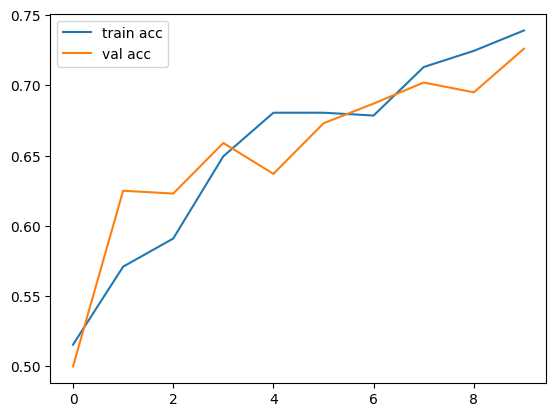

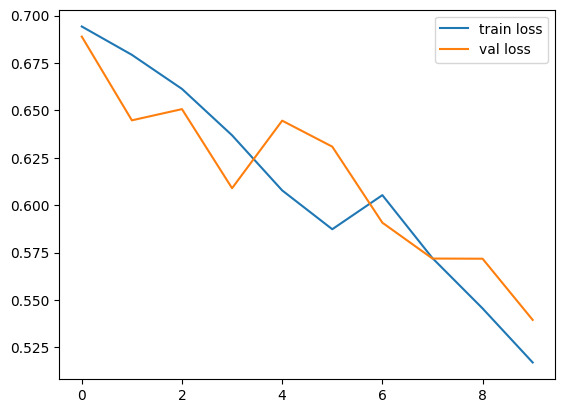

In [32]:
# Step 6: Plot Accuracy & Loss
# ---------------------------
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [48]:
def predict_image(image_path):
    # Read and preprocess image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Convert BGR → RGB
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_norm = img_resized / 255.0
    img_exp = np.expand_dims(img_norm, axis=0)

    # Prediction
    prediction = model.predict(img_exp)
    prob = prediction[0][0]   # between 0 and 1

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Print with confidence
    if prob > 0.5:
        print(f"This is a Dog 🐶 ({prob*100:.2f}% confidence)")
    else:
        print(f"This is a Cat 🐱 ({(1-prob)*100:.2f}% confidence)")


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


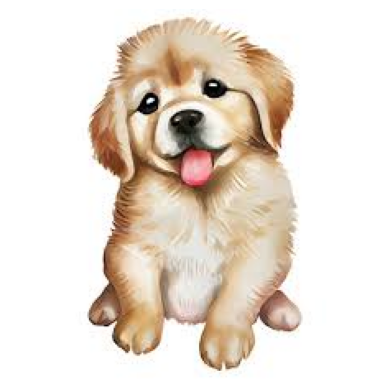

This is a Dog 🐶 (79.90% confidence)


In [54]:
predict_image("/content/drive/MyDrive/Colab Notebooks/cat.jpg")

